## Stock Price prediction
##### Predicting the future prices as well

In [1]:
### importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### loading the dataset (Apple stock price as of 18-02)
df = pd.read_csv('../stocks/apple-18-2.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2021-02-19 00:00:00+00:00,129.87,130.7100,128.80,130.24,87668834,126.505301,127.323538,125.463023,126.865715,87668834,0.0,1.0
1,AAPL,2021-02-22 00:00:00+00:00,126.00,129.7200,125.60,128.01,102886922,122.735566,126.359187,122.345929,124.693491,102886922,0.0,1.0
2,AAPL,2021-02-23 00:00:00+00:00,125.86,126.7100,118.39,123.76,158273022,122.599193,123.427171,115.322727,120.553600,158273022,0.0,1.0
3,AAPL,2021-02-24 00:00:00+00:00,125.35,125.5600,122.23,124.94,111039904,122.102406,122.306966,119.063240,121.703029,111039904,0.0,1.0
4,AAPL,2021-02-25 00:00:00+00:00,120.99,126.4585,120.54,124.68,144766924,117.855366,123.182187,117.417025,121.449765,144766924,0.0,1.0


In [3]:
### targeting the 'close' feature only
df_closing_price = df[['close']].values
df_closing_price

array([[129.87],
       [126.  ],
       [125.86],
       ...,
       [255.78],
       [263.88],
       [264.35]])

In [4]:
### checking the shape of the df_closing_price
df_closing_price.shape

(1255, 1)

In [5]:
### cling the data using the minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
df_closing_price = scaler.fit_transform(df_closing_price)
df_closing_price

array([[0.07955014],
       [0.05676264],
       [0.05593829],
       ...,
       [0.82093859],
       [0.86863334],
       [0.87140081]])

In [6]:
### checking it's shape again
df_closing_price.shape

(1255, 1)

In [7]:
### making the sequences
X, y = [], []
days = 90

for i in range(len(df_closing_price) - days) : 

    X.append(df_closing_price[i : i + days])
    y.append(df_closing_price[i + days])

X = np.array(X)
y = np.array(y)

In [8]:
### checking the shape of X and y
print(f"{X.shape} :: {y.shape}")

(1165, 90, 1) :: (1165, 1)


In [10]:
### making the train and test sequences
test_size = int(len(df_closing_price) * 0.80)
X_train, X_test = X[:test_size], X[test_size:]
y_train, y_test = y[:test_size], y[test_size:]

In [12]:
### checking the shape of the train and the test sequences
print(f"{X_train.shape} :: {y_train.shape} \n{X_test.shape} :: {y_test.shape}")

(1004, 90, 1) :: (1004, 1) 
(161, 90, 1) :: (161, 1)


In [13]:
### importing the Keras libraries for the LSTM model
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional

In [15]:
### making the model
model = Sequential([
    LSTM(50, return_sequences = True, input_shape = (days, 1)),
    Dropout(0.33),
    Bidirectional(LSTM(100)),
    Dropout(0.33),
    Dense(1, activation = 'linear')
])
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse'])

In [17]:
### checking the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 90, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 90, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 200)            │       120,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,401 (513.29 KB)

 Trainable params: 131,401 (513.29 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
### training the model
model.fit(X_train, y_train, epochs = 50, batch_size = 64, verbose = 1)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0671 - mse: 0.0671
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0082 - mse: 0.0082
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0051 - mse: 0.0051
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0043 - mse: 0.0043
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0038 - mse: 0.0038
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0033 - mse: 0.0033
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0035 - mse: 0.0035
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0034 - mse: 0.0034
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0031 - mse: 0.0031
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0030 - mse: 0.0030
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0030 - mse: 0.0030
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0023 - mse: 0.0023
Epoch 13/50
16/16 ━━━━━━━━━━━━━━━━━━

In [19]:
### predictions on the X_test
y_pred = model.predict(X_test)
y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


array([[0.49493897],
       [0.500056  ],
       [0.50771415],
       [0.5193431 ],
       [0.5322343 ],
       [0.54114676],
       [0.5470756 ],
       [0.5513311 ],
       [0.55447334],
       [0.5558764 ],
       [0.5540882 ],
       [0.5510076 ],
       [0.54825866],
       [0.5453066 ],
       [0.54424965],
       [0.54531664],
       [0.5488792 ],
       [0.553597  ],
       [0.55754906],
       [0.56076974],
       [0.5634683 ],
       [0.56317556],
       [0.5598809 ],
       [0.55401295],
       [0.54354554],
       [0.5326352 ],
       [0.5228353 ],
       [0.5225757 ],
       [0.5333248 ],
       [0.55548006],
       [0.5789015 ],
       [0.60114026],
       [0.6235189 ],
       [0.64237016],
       [0.6555854 ],
       [0.66395605],
       [0.6659603 ],
       [0.66203105],
       [0.6538162 ],
       [0.6466312 ],
       [0.64055955],
       [0.6383896 ],
       [0.63927525],
       [0.6440438 ],
       [0.6495395 ],
       [0.6527341 ],
       [0.66140616],
       [0.672

In [20]:
### using the inverse scaler for the metrics and plotting
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

In [21]:
### for the comparison plotting the graphs and the metrices
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
print(f"MAE : {mean_absolute_error(y_test, y_pred)}")
print(f"MSE : {mean_squared_error(y_test, y_pred)}")
print(f"RMSE : {root_mean_squared_error(y_test, y_pred)}")

MAE : 6.512278984496312
MSE : 63.960109206703855
RMSE : 7.997506436802903


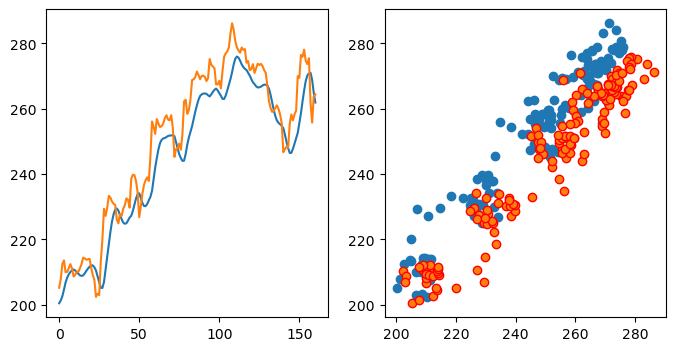

In [22]:
### plotting out the things
plt.figure(figsize = (8, 4))
plt.subplot(1, 2, 1)
plt.plot(y_pred)
plt.plot(y_test)
plt.subplot(1, 2, 2)
plt.scatter(y_pred, y_test)
plt.scatter(y_test, y_pred, edgecolors = 'r')
plt.show()

In [ ]:
### predictions on the next 90 days price
### will start tomrrow